In [28]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import datasets, transforms, utils
from torch.utils.data.sampler import SubsetRandomSampler
from torch.nn import functional as F
import matplotlib.pyplot as plt

In [29]:
batch_size = 64
input_size = 784 
num_classes = 1   
num_epochs = 10  
learning_rate = 0.0001 
momentum = 0.0 

In [30]:
train_data = datasets.MNIST('./data/anupam-data/pytorch/data/', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))
test_data = datasets.MNIST('./data/anupam-data/pytorch/data/', train=False, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))

subset_indices = ((train_data.train_labels == 0) + (train_data.train_labels == 1)).nonzero().view(-1)

train_loader = torch.utils.data.DataLoader(dataset=train_data, 
                                           batch_size=batch_size, 
                                           shuffle=False,
                                           sampler=SubsetRandomSampler(subset_indices))

subset_indices = ((test_data.test_labels == 0) + (test_data.test_labels == 1)).nonzero().view(-1)

test_loader = torch.utils.data.DataLoader(dataset=test_data, 
                                          batch_size=batch_size,
                                          shuffle=False,
                                          sampler=SubsetRandomSampler(subset_indices))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/anupam-data/pytorch/data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/anupam-data/pytorch/data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/anupam-data/pytorch/data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/anupam-data/pytorch/data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/anupam-data/pytorch/data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/anupam-data/pytorch/data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/anupam-data/pytorch/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/anupam-data/pytorch/data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [31]:
class SVM_Loss(nn.modules.Module):    
    def __init__(self):
        super(SVM_Loss,self).__init__()
    def forward(self, outputs, labels):
         return torch.sum(torch.clamp(1 - outputs.t()*labels, min=0))/batch_size

In [32]:
svm_model = nn.Linear(input_size,num_classes)

In [33]:
svm_loss_criteria = SVM_Loss()

In [34]:
svm_optimizer = torch.optim.SGD(svm_model.parameters(), lr=learning_rate, momentum=momentum)

In [35]:
total_step = len(train_loader)
for epoch in range(num_epochs):
    avg_loss_epoch = 0
    batch_loss = 0
    total_batches = 0
    for i, (images, labels) in enumerate(train_loader):
        
        images = images.reshape(-1, 28*28)                      
        labels = Variable(2*(labels.float()-0.5))
                
                
        outputs = svm_model(images)           
        loss_svm = svm_loss_criteria(outputs, labels)    
        
       
        
        svm_optimizer.zero_grad()
        loss_svm.backward()
        svm_optimizer.step()    
        
        
        total_batches += 1     
        batch_loss += loss_svm.item()

    avg_loss_epoch = batch_loss/total_batches
    print ('Epoch [{}/{}], Averge Loss:for epoch[{}, {:.5f}]' 
                   .format(epoch+1, num_epochs, epoch+1, avg_loss_epoch ))

Epoch [1/10], Averge Loss:for epoch[1, 0.23177]
Epoch [2/10], Averge Loss:for epoch[2, 0.04704]
Epoch [3/10], Averge Loss:for epoch[3, 0.03262]
Epoch [4/10], Averge Loss:for epoch[4, 0.02667]
Epoch [5/10], Averge Loss:for epoch[5, 0.02310]
Epoch [6/10], Averge Loss:for epoch[6, 0.02062]
Epoch [7/10], Averge Loss:for epoch[7, 0.01880]
Epoch [8/10], Averge Loss:for epoch[8, 0.01741]
Epoch [9/10], Averge Loss:for epoch[9, 0.01629]
Epoch [10/10], Averge Loss:for epoch[10, 0.01535]


In [36]:
correct = 0.
total = 0.
for images, labels in test_loader:
    images = images.reshape(-1, 28*28)
    
    outputs = svm_model(images)    
    predicted = outputs.data >= 0
    total += labels.size(0) 
    correct += (predicted.view(-1).long() == labels).sum()  

In [38]:
print('Accuracy of the SVM model: %f %%' % (100 * (correct.float() / total)))

Accuracy of the SVM model: 99.858162 %


In [88]:
n_epochs = 10
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [91]:
train_loader = torch.utils.data.DataLoader(
  datasets.MNIST('/files/', train=True, download=True,
                             transform=transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  datasets.MNIST('/files/', train=False, download=True,
                             transform=transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /files/MNIST/raw/train-images-idx3-ubyte.gz to /files/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /files/MNIST/raw/train-labels-idx1-ubyte.gz to /files/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /files/MNIST/raw/t10k-images-idx3-ubyte.gz to /files/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /files/MNIST/raw/t10k-labels-idx1-ubyte.gz to /files/MNIST/raw



In [92]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

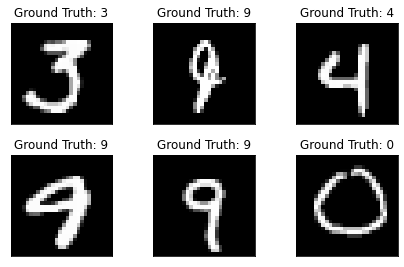

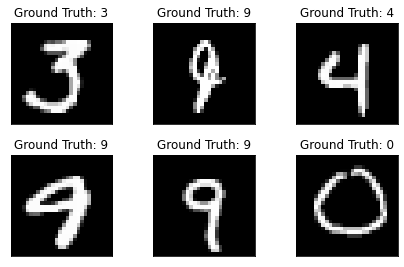

In [93]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig


In [94]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [95]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)

In [96]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [103]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network.state_dict(), '../model.pth')
      torch.save(optimizer.state_dict(), '../optimizer.pth')

In [104]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [105]:
test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.3066, Accuracy: 875/10000 (9%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.319715
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.295023
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.303525
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.260523
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.234916
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.238791
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.219527
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.170977
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.098501
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.887531
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.019411
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.866884
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.729375
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.612884
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.509504
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.537390
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.579883
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.330655
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.092838
Train Epoch: 1 [12160/6

In [109]:
print("The SVM accuracy is: 99% and NN accuracy is: 98%")

The SVM accuracy is: 99% and NN accuracy is: 98%
